In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rta-dataset/RTA Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [3]:
df_rta = pd.read_csv("../input/rta-dataset/RTA Dataset.csv")
df_rta

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [4]:
df_rta.describe(exclude="number")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [5]:
df_rta.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df_rta.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [7]:
bad_columns = ["Casualty_class", "Casualty_severity", "Work_of_casuality", "Fitness_of_casuality", "Vehicle_driver_relation"]

df_remove_col = df_rta.drop(columns=bad_columns)

In [8]:
df_remove_col.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Age_band_of_casualty,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Normal,Collision with roadside objects,2,2,Going straight,Male,31-50,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Female,18-30,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,2-5yr,NaN,Owner,5-10yrs,No defect,...,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
df_remove_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [10]:
## Normalize the Driving experience column

df_rta_normalize = df_remove_col.replace({"Driving_experience" : {'unknown' : 'Unknown'}})
df_rta_no_null = df_rta_normalize.fillna("Unknown")

df_rta_no_null = df_rta_no_null.replace("Unknown", method="ffill")
df_rta_Values = df_rta_no_null.replace("Unknown", method="bfill")

In [11]:
df_rta_Values.head(20)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Age_band_of_casualty,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,5-10yrs,No defect,...,Normal,Collision with roadside objects,2,2,Going straight,Male,31-50,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,5-10yrs,No defect,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Female,18-30,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,2-5yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,Junior high school,2-5yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Normal,Vehicle with vehicle collision,1,1,U-Turn,Male,31-50,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Normal,Vehicle with vehicle collision,1,1,Moving Backward,Female,18-30,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,2-5yr,Automobile,Governmental,Above 10yr,No defect,...,Normal,Vehicle with vehicle collision,2,1,U-Turn,na,na,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Above 10yr,Lorry (41?100Q),Owner,1-2yr,No defect,...,Normal,Collision with roadside-parked vehicles,2,1,Going straight,Male,Under 18,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,1-2yr,Automobile,Owner,2-5yrs,No defect,...,Normal,Collision with roadside-parked vehicles,2,1,U-Turn,Male,18-30,Not a Pedestrian,Moving Backward,Serious Injury


In [12]:

## Checking for any null values
df_rta_Values.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Sex_of_casualty                0
Age_band_of_casualty           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [13]:
df_rta_Values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             12316 non-null  object
 8   Service_year_of_vehicle      12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [14]:
##Converting the Time column to Night/Day from HH:MM:SS

def convert_time(t):
    
    t = t[:2]
    
    if ":" in t:
        t = t[:1]
    return int(t)

def Cat_Time_col(t):
    
    if t >=6 and t < 18:
        return "Day"
    
    else:
        return "Night"
    
df_rta_Values["Time"] = df_rta_Values["Time"].apply(lambda x : convert_time(x))
df_rta_Values["Time"] = df_rta_Values["Time"].apply(lambda x : Cat_Time_col(x))

In [15]:
df_rta_Values["Time"].value_counts(dropna=False)

Day      8361
Night    3955
Name: Time, dtype: int64

In [16]:
## Converting each of the columns from categorical to numericals

df_rta_mapping = df_rta_Values

df_rta_Values["Sex_of_driver"] = df_rta_Values["Sex_of_driver"].map({"Male" : 1, "Female" : 0})
df_rta_Values["Time"] = df_rta_Values["Time"].map({"Day" : 1, "Night": 0})
df_rta_Values["Driving_experience"] = df_rta_Values["Driving_experience"].map({'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4, 'Above 10yr': 5})
df_rta_Values["Educational_level"] = df_rta_Values["Educational_level"].map({'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2, 'Junior high school': 3, 'High school': 4, 'Above high school': 5})
df_rta_Values["Accident_severity"] = df_rta_Values["Accident_severity"].map({'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2})
df_rta_Values["Age_band_of_driver"] = df_rta_Values["Age_band_of_driver"].map({'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3})
 
df_rta_afterMap = df_rta_Values

In [17]:
df_rta_afterMap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  int64 
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  int64 
 3   Sex_of_driver                12316 non-null  int64 
 4   Educational_level            12316 non-null  int64 
 5   Driving_experience           12316 non-null  int64 
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             12316 non-null  object
 8   Service_year_of_vehicle      12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [18]:
## Now next step would be to convert the remaining set of columns to the numericals

col_mapped = ['Driving_experience', 'Sex_of_driver', 'Age_band_of_driver', 'Educational_level', 'Time', 'Accident_severity']

In [19]:
columns = list(df_rta_afterMap.columns)
int_columns = ["Number_of_vehicles_involved", "Number_of_casualties"]
total_int_columns = int_columns + col_mapped

remaining_col_covertion = list(set(columns) - set(total_int_columns))
print("Resultant Columns :", remaining_col_covertion)

Resultant Columns : ['Type_of_collision', 'Pedestrian_movement', 'Cause_of_accident', 'Light_conditions', 'Defect_of_vehicle', 'Types_of_Junction', 'Road_allignment', 'Day_of_week', 'Service_year_of_vehicle', 'Area_accident_occured', 'Road_surface_type', 'Road_surface_conditions', 'Type_of_vehicle', 'Vehicle_movement', 'Weather_conditions', 'Sex_of_casualty', 'Owner_of_vehicle', 'Age_band_of_casualty', 'Lanes_or_Medians']


In [20]:
## Use get_dummies to convert into the numerical values

df_rta_dummies = pd.get_dummies(df_rta_afterMap, columns= remaining_col_covertion)

df_rta_dummies

,Time,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Type_of_collision_Collision with animals,Type_of_collision_Collision with pedestrians,...,Age_band_of_casualty_5,Age_band_of_casualty_Over 51,Age_band_of_casualty_Under 18,Age_band_of_casualty_na,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_other
0,1,1,1,5,2,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,2,1,3,5,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,1,1,3,2,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,3,4,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,3,3,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,2,1,2,3,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
12312,0,2,1,2,4,2,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
12313,1,3,1,3,4,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12314,1,1,0,3,5,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:title={'center':'Unique values per feature'}>

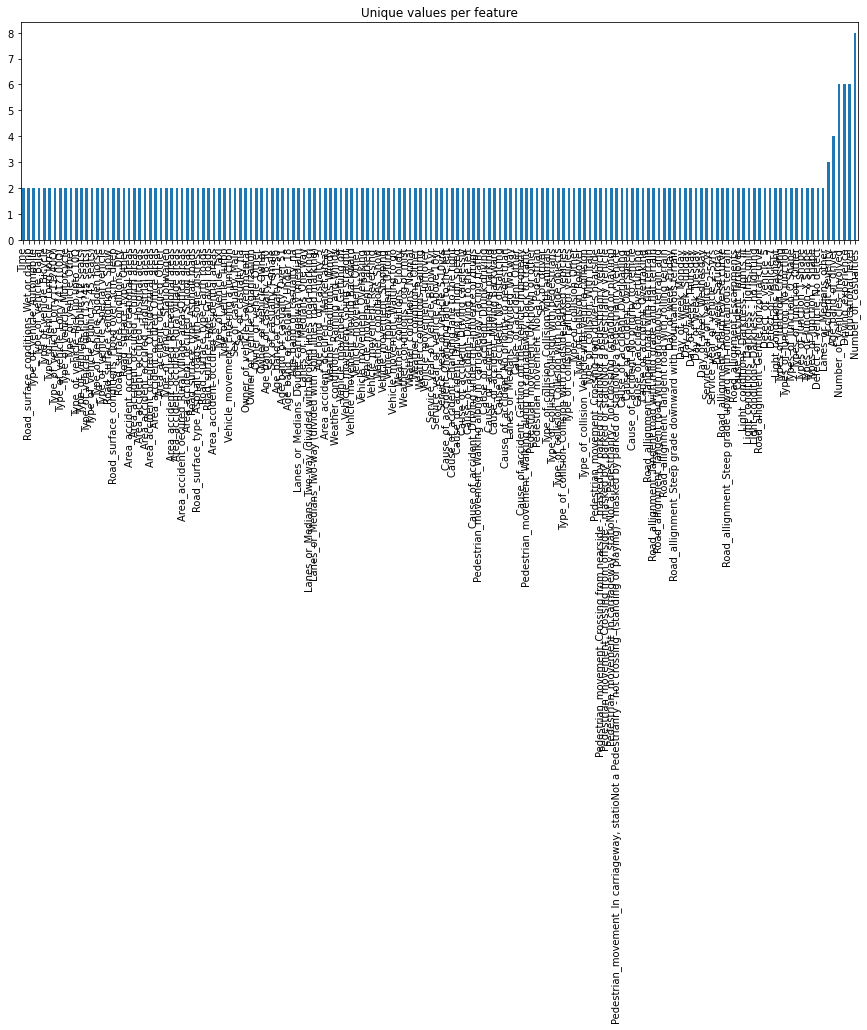

In [21]:
unique_values = df_rta_dummies.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature")

In [22]:
df_rta_dummies.head(20)

,Time,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Type_of_collision_Collision with animals,Type_of_collision_Collision with pedestrians,...,Age_band_of_casualty_5,Age_band_of_casualty_Over 51,Age_band_of_casualty_Under 18,Age_band_of_casualty_na,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_other
0,1,1,1,5,2,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,2,1,3,5,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,1,1,3,2,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,3,4,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,3,3,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,1,2,1,3,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,1,3,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1,1,1,3,3,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,1,1,1,3,5,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,1,1,1,3,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
df_rta_dummies.isnull().sum()

Time                                                                 0
Age_band_of_driver                                                   0
Sex_of_driver                                                        0
Educational_level                                                    0
Driving_experience                                                   0
                                                                    ..
Lanes_or_Medians_One way                                             0
Lanes_or_Medians_Two-way (divided with broken lines road marking)    0
Lanes_or_Medians_Two-way (divided with solid lines road marking)     0
Lanes_or_Medians_Undivided Two way                                   0
Lanes_or_Medians_other                                               0
Length: 158, dtype: int64

In [24]:
## Now need to split the data for train and test

X_rta = df_rta_dummies.drop(columns=["Accident_severity"])
y_rta = df_rta_dummies["Accident_severity"]

X_train, X_test, y_train, y_test = train_test_split(X_rta, y_rta, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)

(9852, 157)
(2464, 157)


In [25]:
##Building of the Decision Tree model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
##Performing the predictions 
y_pred = model.predict(X_test)

In [27]:
## Next we would require to evalute the model on the basis of its accuracy

accuracy = accuracy_score(y_test,y_pred)

print("Accuracy : %2f%%" % (accuracy*100))

Accuracy : 76.420455%


In [28]:
## Now perform this on the XGboost

model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy %2f%%" % (accuracy * 100))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:26:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 84.983766%


In [29]:
## Finding the accuracy for the trained model
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(9852, 157) (9852,)
(2464, 157) (2464,)


In [30]:
dt = DecisionTreeClassifier()
model = dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy %2f%%" % (accuracy * 100))

Accuracy 84.983766%


In [31]:
## fit the model for Linear regression
lm = LinearRegression()
model = lm.fit(X_train,y_train)
prediction = lm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy %2f%%" % (accuracy * 100))

Accuracy 84.983766%
